# Imports

In [2]:
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from pandas_datareader import data as pdr
import sklearn
from bs4 import BeautifulSoup
import bs4 as bs
import datetime as dt
yfin.pdr_override()

In [3]:

style.use('ggplot')
#yyyy-mm-dd
'''
start = dt.datetime(2010,1,1)
end = dt.datetime(2022,12,31)
#Dataframe web reader of the ticker
df = pdr.get_data_yahoo('TSLA', start, end)
'''

#df.to_csv('TSLA.csv')

df = pd.read_csv('TSLA.csv', parse_dates = True, index_col = 0)
print(df.head())


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


        Date        open        high         low       close
452  19309.0  190.949997  194.419998  167.869995  169.910004
453  19319.0  183.199997  194.860001  180.830002  194.860001
454  19329.0  182.449997  182.449997  167.820007  167.820007
455  19339.0  160.949997  160.949997  125.349998  125.349998
456  19349.0  123.150002  123.180000  109.099998  123.180000


<IPython.core.display.Javascript object>


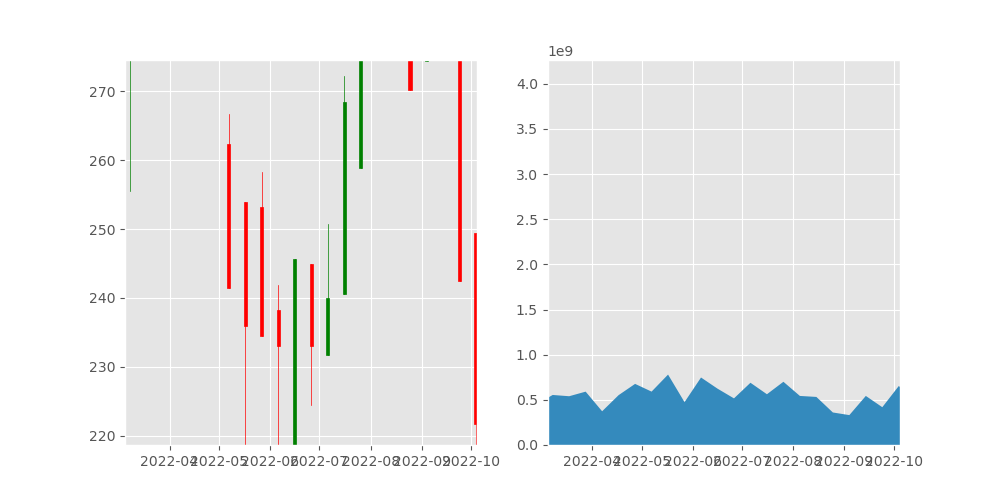

In [4]:
#plot
%matplotlib notebook
#df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True)
#print(df.tail())

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.tail())


plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2, sharex=ax1)

ax1.xaxis_date()
#ax1.plot(df.index, df['Adj Close'])
#ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup ='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

